<a href="https://colab.research.google.com/github/ACSoupir/PytorchExamples/blob/master/PyTorch_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Classifier on CIFAR-10 Data

In [1]:
import sys
sys.version

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

In [0]:
#!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [0]:
import torch
torch.manual_seed(333)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import torchvision
import torch.nn as nn
import numpy as np
np.random.seed(333)
import torchvision.transforms as transforms

# Input Pipeline

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
# Download and construct CIFAR-10 dataset.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Visualize the an image in the CIFAR10 dataset

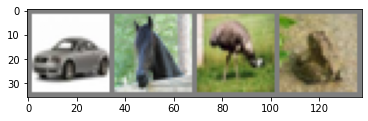

  car horse  bird  frog


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Create CNN

In [0]:
import torch.nn as nn
import torch.nn.functional as F

Need to create a class with the `__init__`

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
#use_cuda = True
#if use_cuda and torch.cuda.is_available():
#    net.cuda()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

#print(device)

In [12]:
use_cuda=True
net = Net()

if(use_cuda):
  net = net.to(device)
  print("GPU (", device, ") will be used!", sep="")
else:
  print("Training will happen on CPU!!\n")
  print(net)

GPU (cuda:0) will be used!


In [0]:
#use_cuda = True
#net = net.to(device)
#print(net)

# Defining Loss and Optimization Functions

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the Network

In [15]:
use_cuda

True

In [16]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        #if gpu is available, send images and labels to the gpu
        #inputs, labels = data[0].to(device), data[1].to(device)
        if use_cuda:
          inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.857
[1,  6000] loss: 1.682
[1,  8000] loss: 1.637
[1, 10000] loss: 1.570
[1, 12000] loss: 1.529
[2,  2000] loss: 1.462
[2,  4000] loss: 1.430
[2,  6000] loss: 1.397
[2,  8000] loss: 1.384
[2, 10000] loss: 1.356
[2, 12000] loss: 1.342
[3,  2000] loss: 1.278
[3,  4000] loss: 1.260
[3,  6000] loss: 1.246
[3,  8000] loss: 1.257
[3, 10000] loss: 1.238
[3, 12000] loss: 1.241
[4,  2000] loss: 1.158
[4,  4000] loss: 1.152
[4,  6000] loss: 1.158
[4,  8000] loss: 1.165
[4, 10000] loss: 1.155
[4, 12000] loss: 1.164
[5,  2000] loss: 1.078
[5,  4000] loss: 1.059
[5,  6000] loss: 1.100
[5,  8000] loss: 1.087
[5, 10000] loss: 1.093
[5, 12000] loss: 1.092
[6,  2000] loss: 1.015
[6,  4000] loss: 1.010
[6,  6000] loss: 1.022
[6,  8000] loss: 1.035
[6, 10000] loss: 1.028
[6, 12000] loss: 1.056
[7,  2000] loss: 0.948
[7,  4000] loss: 0.961
[7,  6000] loss: 0.984
[7,  8000] loss: 0.985
[7, 10000] loss: 0.994
[7, 12000] loss: 1.007
[8,  2000] loss: 0.916
[8,  4000] 

# Saving the trained model

In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Testing model

This is going to check whether the predicted class is the same as the true test class. First, the true class of the images are printed. Following, the images are passed into the model and then the predicted classes are appended to a list and printed out.

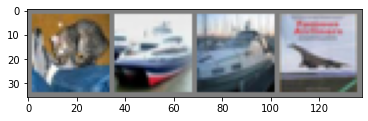

GroundTruth:    cat  ship  ship plane


In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Loading in the model.

Interestingly, we set `net` to go to `device` which is gpu, but we also have to later set the images that the classes is being predicted for `.to(device)` otherwise it gives an error.

In [0]:
net = Net()
net.load_state_dict(torch.load(PATH))
net = net.to(device)

In [0]:
outputs = net(images.to(device))

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


Now to look at the whole data set accuracy, remembering to send the images and labels to the GPU (device).

In [22]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
  100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


What is the accuracy by class, since there appears to be some that are performing well but some still not performing great leaving the overall around 60%.

In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 70 %
Accuracy of  bird : 36 %
Accuracy of   cat : 47 %
Accuracy of  deer : 32 %
Accuracy of   dog : 49 %
Accuracy of  frog : 78 %
Accuracy of horse : 62 %
Accuracy of  ship : 71 %
Accuracy of truck : 81 %


'Frog' and 'Truck' predictions seem to be fairly high at around the 80% correct, while things like cats and birds, mostly the animals, seem to be having a much harder time with predictions. However, it is good to note that all of these are much higher than the random chance of selecting the correct class, which would be 10%.